# Table of Contents
## DATA PREPERATION
### Step 1 : Loading the libraries
### Step 2 : Loading the dataset
### Step 3 : Cleaning the dataset
### Step 3.1 : Handling Null values

    


## DATA DERIVATION
### Step 4 : Feature Engineering
### Step 4.1 : Creating dummies 
### Step 4.2 : Dropping null values 
### Step 4.3 : Normalising the dataset 
### step 4.4 : creating dependant and indepandat variables


## CONSTRUCTION OF MODELS
### Step 5 : Model Building
### Step 5.1 : Splitting Training set and test set
### Step 5.2 : Converting to tensor 
### Step 5.3 : Multi layer perceptron 
#### Step 5.3.1 : MLP hyper parameter tuning
### Step 5.4 : Support vector machines 
#### Step 5.4.1 : SVM hyper parameter tuning

### Step 1 : loading the Libraries 

In [194]:
import torch
import os

import numpy as np
import pandas as pd


In [195]:
#pip install tqdm
#!pip install imblearn
from tqdm import tqdm

In [196]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Step 2 : Loading the dataset 

In [200]:
df = pd.read_csv('weatherAUS.csv')

In [201]:
df.shape


(145460, 23)

In [202]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### Step 3 : Cleaning the dataset

In [203]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Step 3.1 : Handling Null values

<AxesSubplot:>

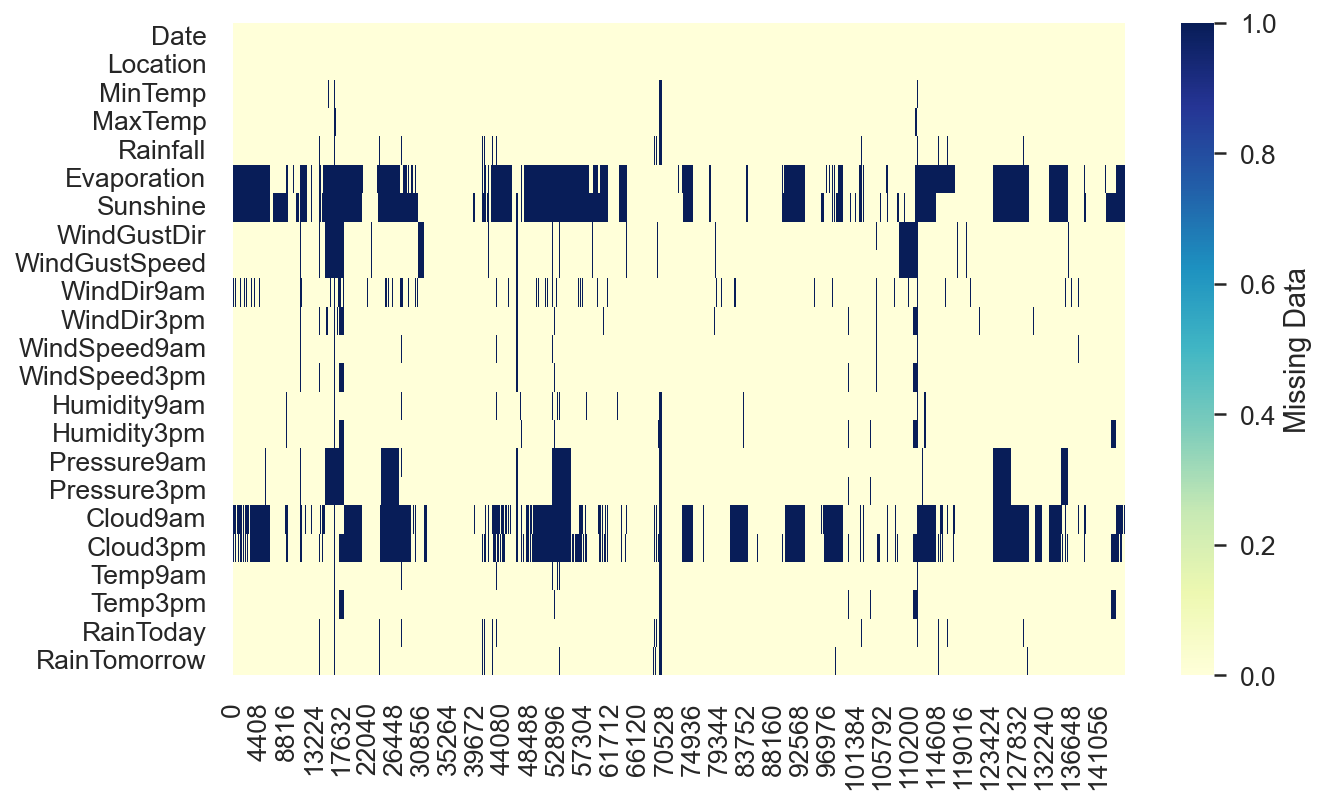

In [204]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<AxesSubplot:>

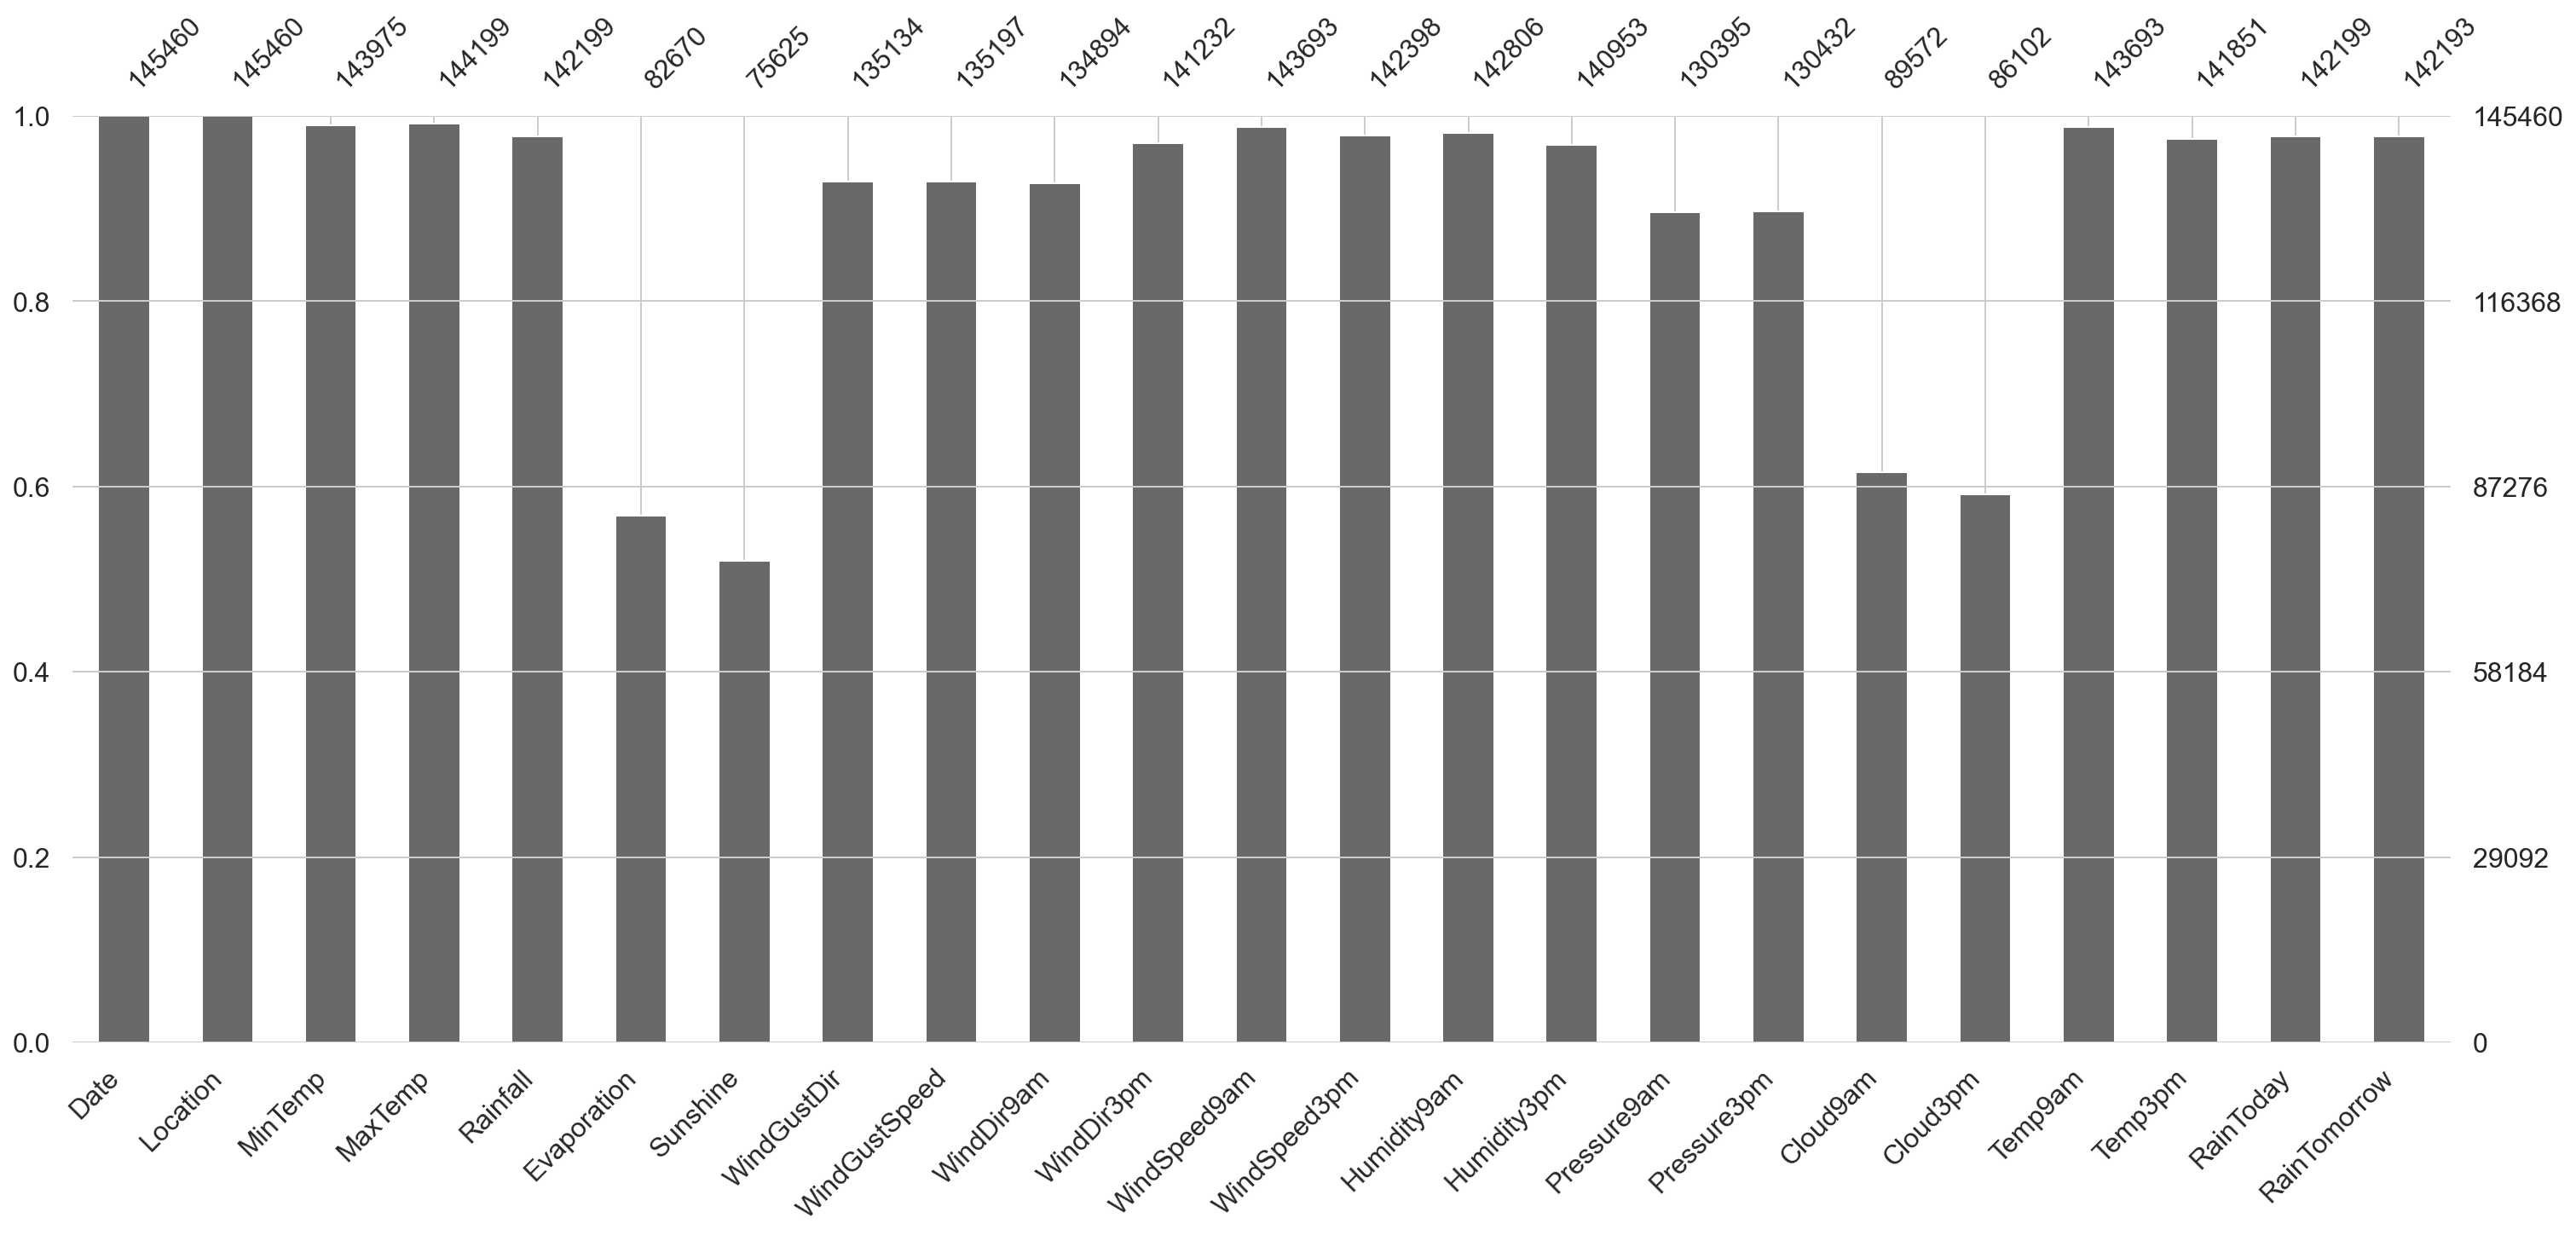

In [205]:
import missingno as msno
  

#values in a bar chart
msno.bar(df)

In [131]:
cols = ['MinTemp','MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',  'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']
df1 = df[cols]

In [132]:
df1.shape

(145460, 9)

<AxesSubplot:>

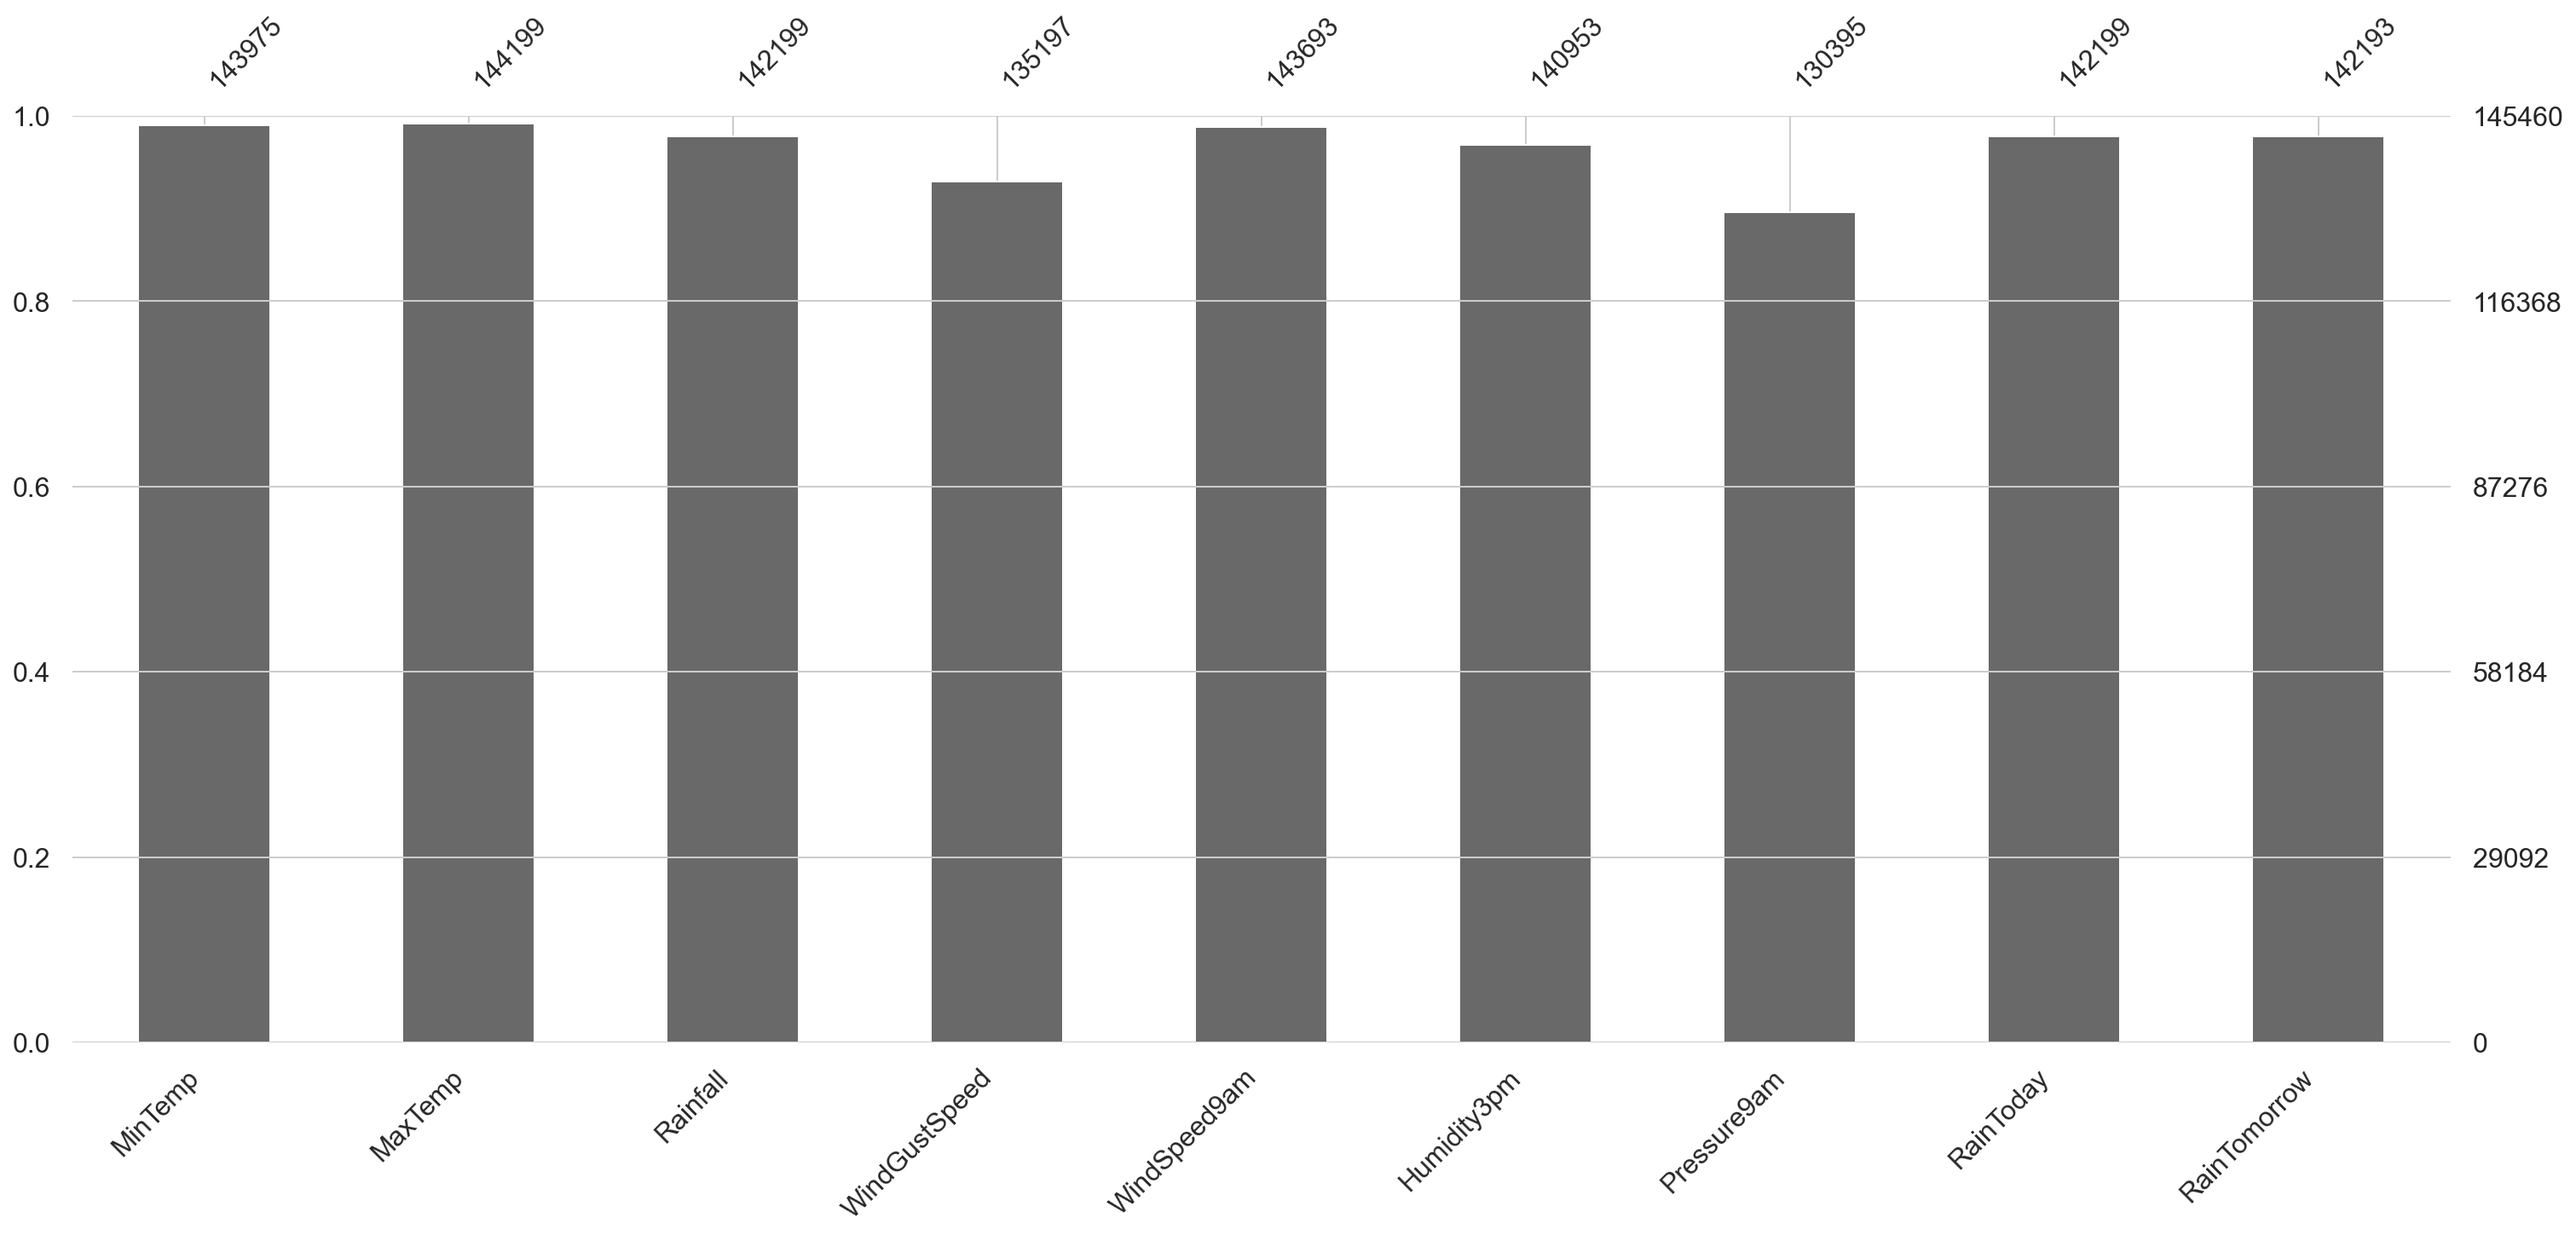

In [133]:
import missingno as msno
  

#values in a bar chart
msno.bar(df1)

### Step 4 : Feature Engineering

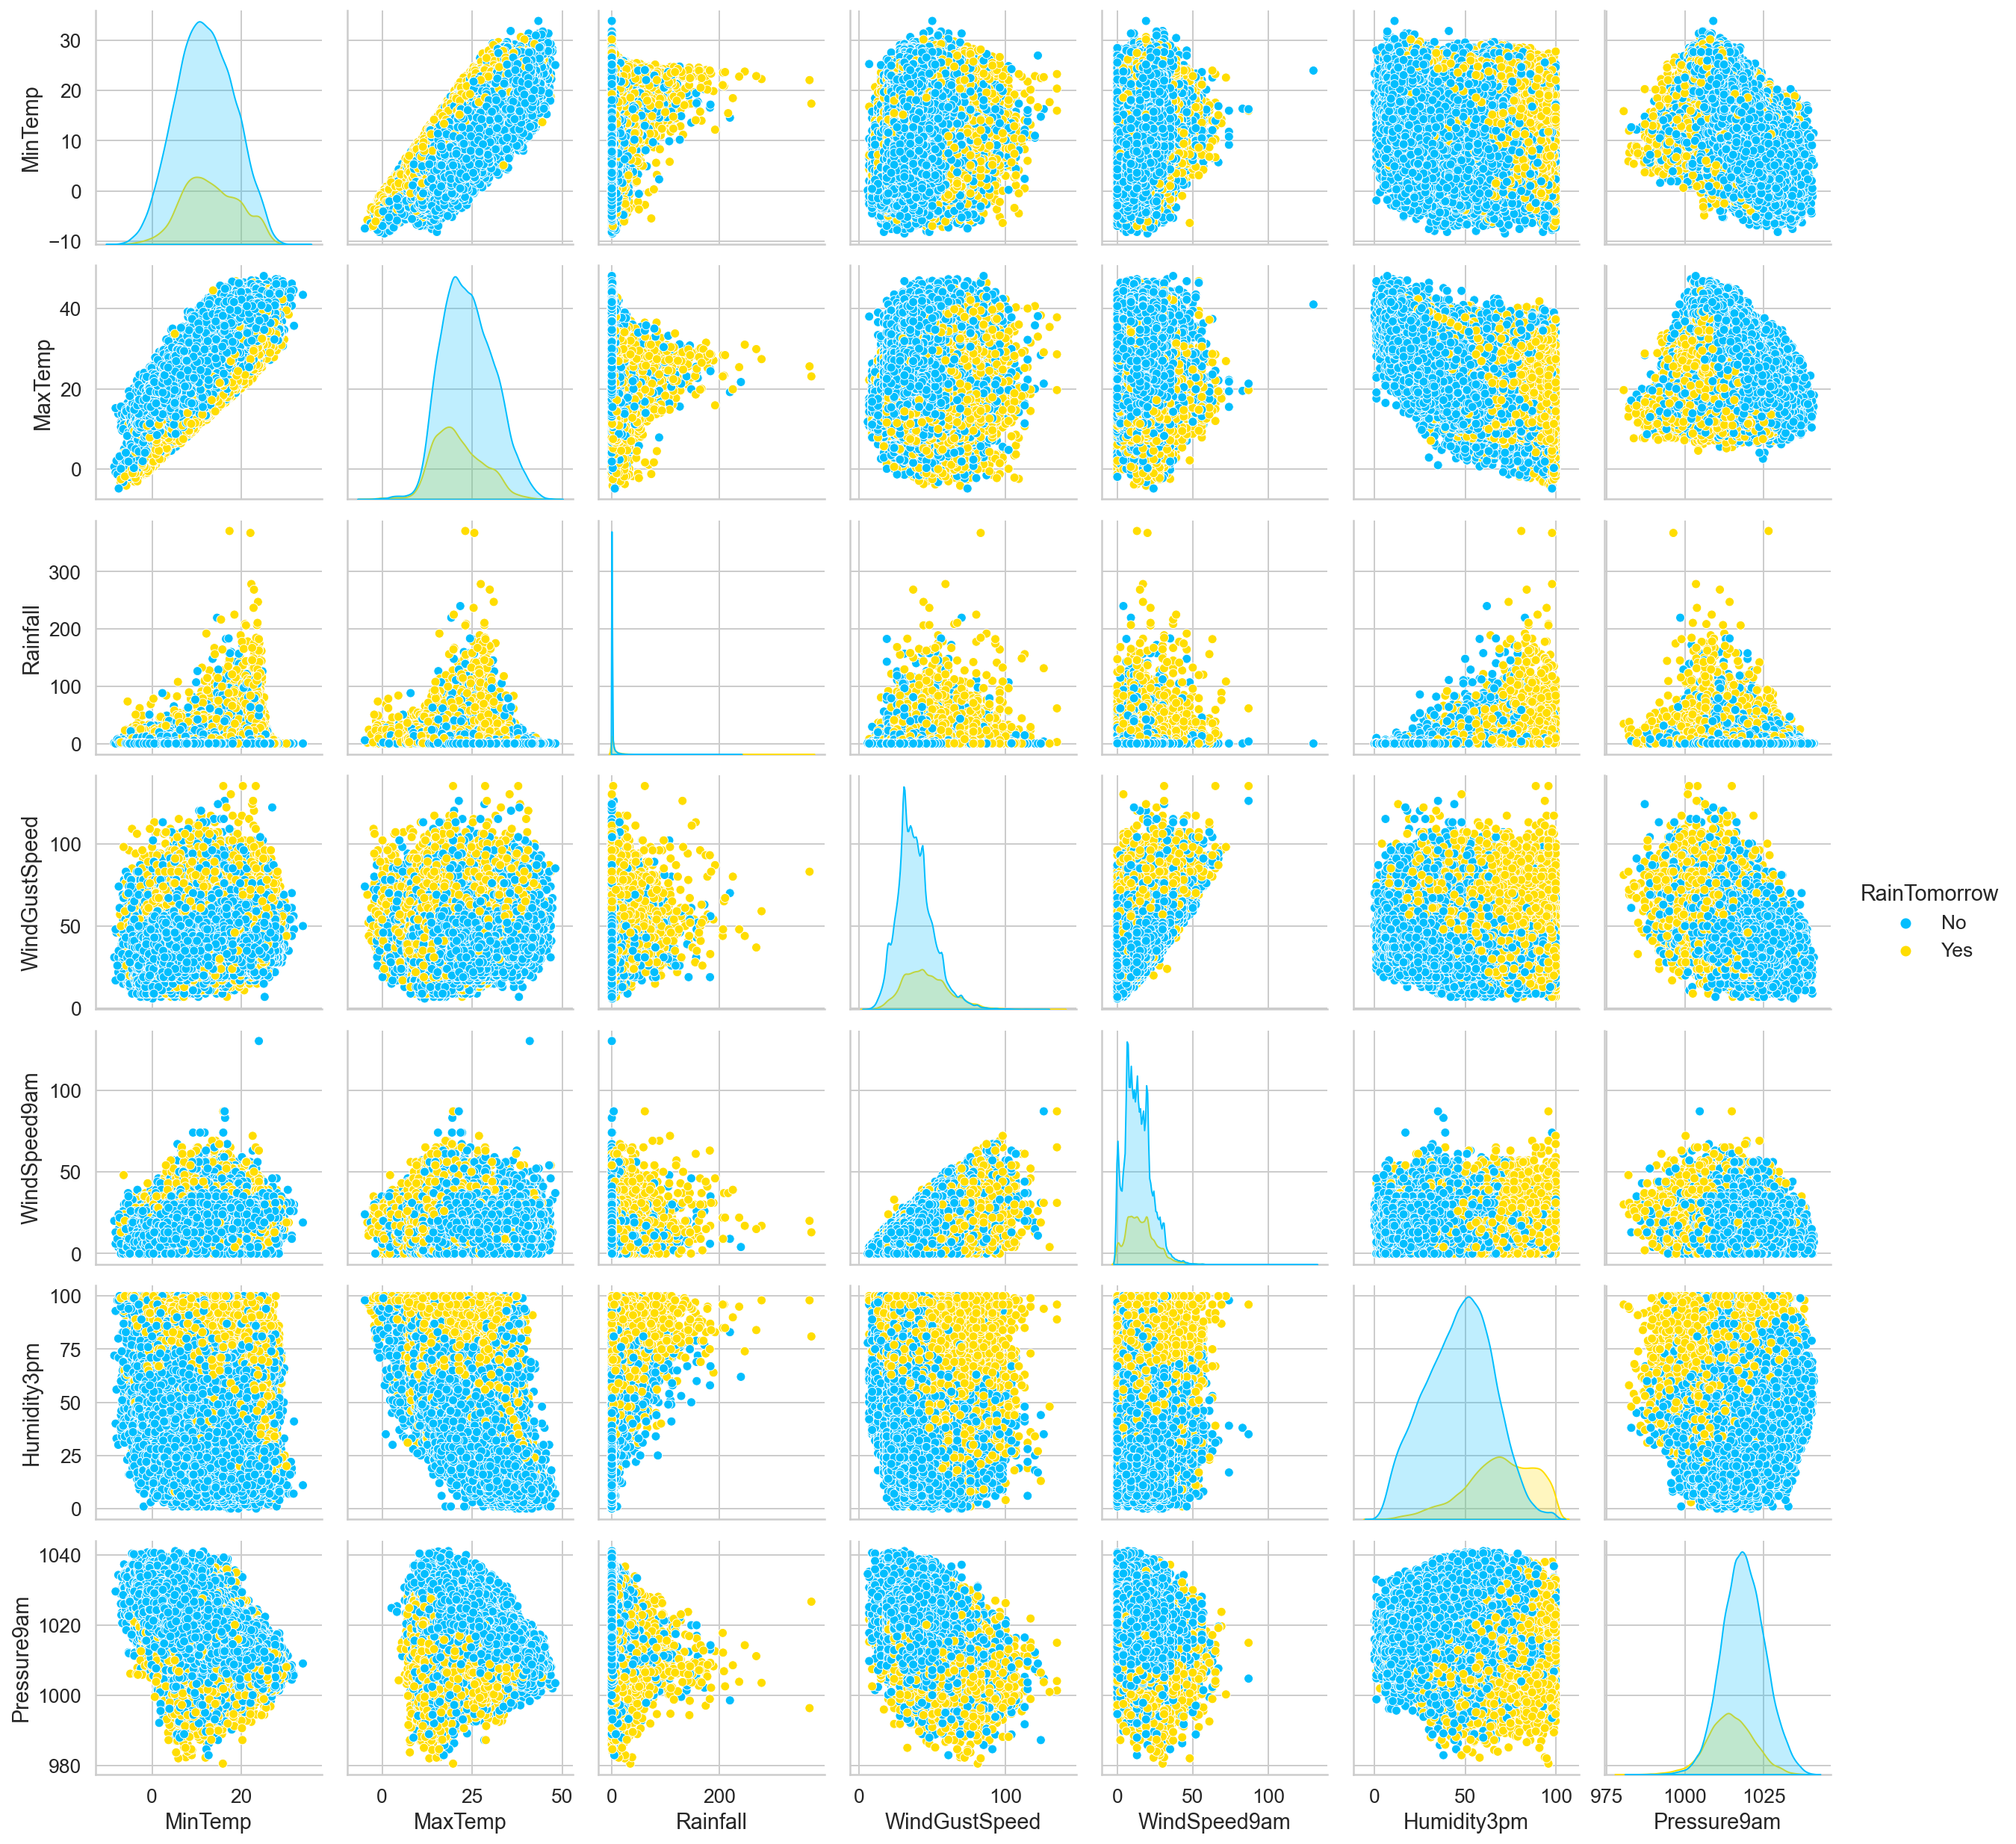

In [19]:
plot_rain = df1[['MinTemp','MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',  'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']]

sns.pairplot(plot_rain, hue='RainTomorrow' , diag_kind = 'kde');

### Step 4.1 : Creating dummies

In [206]:
df1['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df1['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [207]:
df2 = df1.dropna(how='any')

In [208]:
df2.head(20)

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity3pm  \
0      13.4     22.9       0.6           44.0          20.0         22.0   
1       7.4     25.1       0.0           44.0           4.0         25.0   
2      12.9     25.7       0.0           46.0          19.0         30.0   
3       9.2     28.0       0.0           24.0          11.0         16.0   
4      17.5     32.3       1.0           41.0           7.0         33.0   
5      14.6     29.7       0.2           56.0          19.0         23.0   
6      14.3     25.0       0.0           50.0          20.0         19.0   
7       7.7     26.7       0.0           35.0           6.0         19.0   
8       9.7     31.9       0.0           80.0           7.0          9.0   
9      13.1     30.1       1.4           28.0          15.0         27.0   
10     13.4     30.4       0.0           30.0          17.0         22.0   
11     15.9     21.7       2.2           31.0          15.0         91.0   
12     15.9     18.6      15.6           61.0          28.0         93.0   
13     12.6     21.0       3.6           44.0          24.0         43.0   
16     14.1     20.9       0.0           22.0          11.0         82.0   
17     13.5     22.9      16.8           63.0           6.0         65.0   
18     11.2     22.5      10.6           43.0          24.0         32.0   
19      9.8     25.6       0.0           26.0          17.0         26.0   
20     11.5     29.3       0.0           24.0           9.0         28.0   
21     17.1     33.0       0.0           43.0          17.0         28.0   

    Pressure9am  RainToday  RainTomorrow  
0        1007.7        0.0           0.0  
1        1010.6        0.0           0.0  
2        1007.6        0.0           0.0  
3        1017.6        0.0           0.0  
4        1010.8        0.0           0.0  
5        1009.2        0.0           0.0  
6        1009.6        0.0           0.0  
7        1013.4        0.0           0.0  
8        1008.9        0.0           1.0  
9        1007.0        1.0           0.0  
10       1011.8        0.0           1.0  
11       1010.5        1.0           1.0  
12        994.3        1.0           1.0  
13       1001.2        1.0           0.0  
16       1012.2        0.0           1.0  
17       1005.8        1.0           1.0  
18       1009.4        1.0           0.0  
19       1019.2        0.0           0.0  
20       1019.3        0.0           0.0  
21       1013.6        0.0           0.0

<AxesSubplot:>

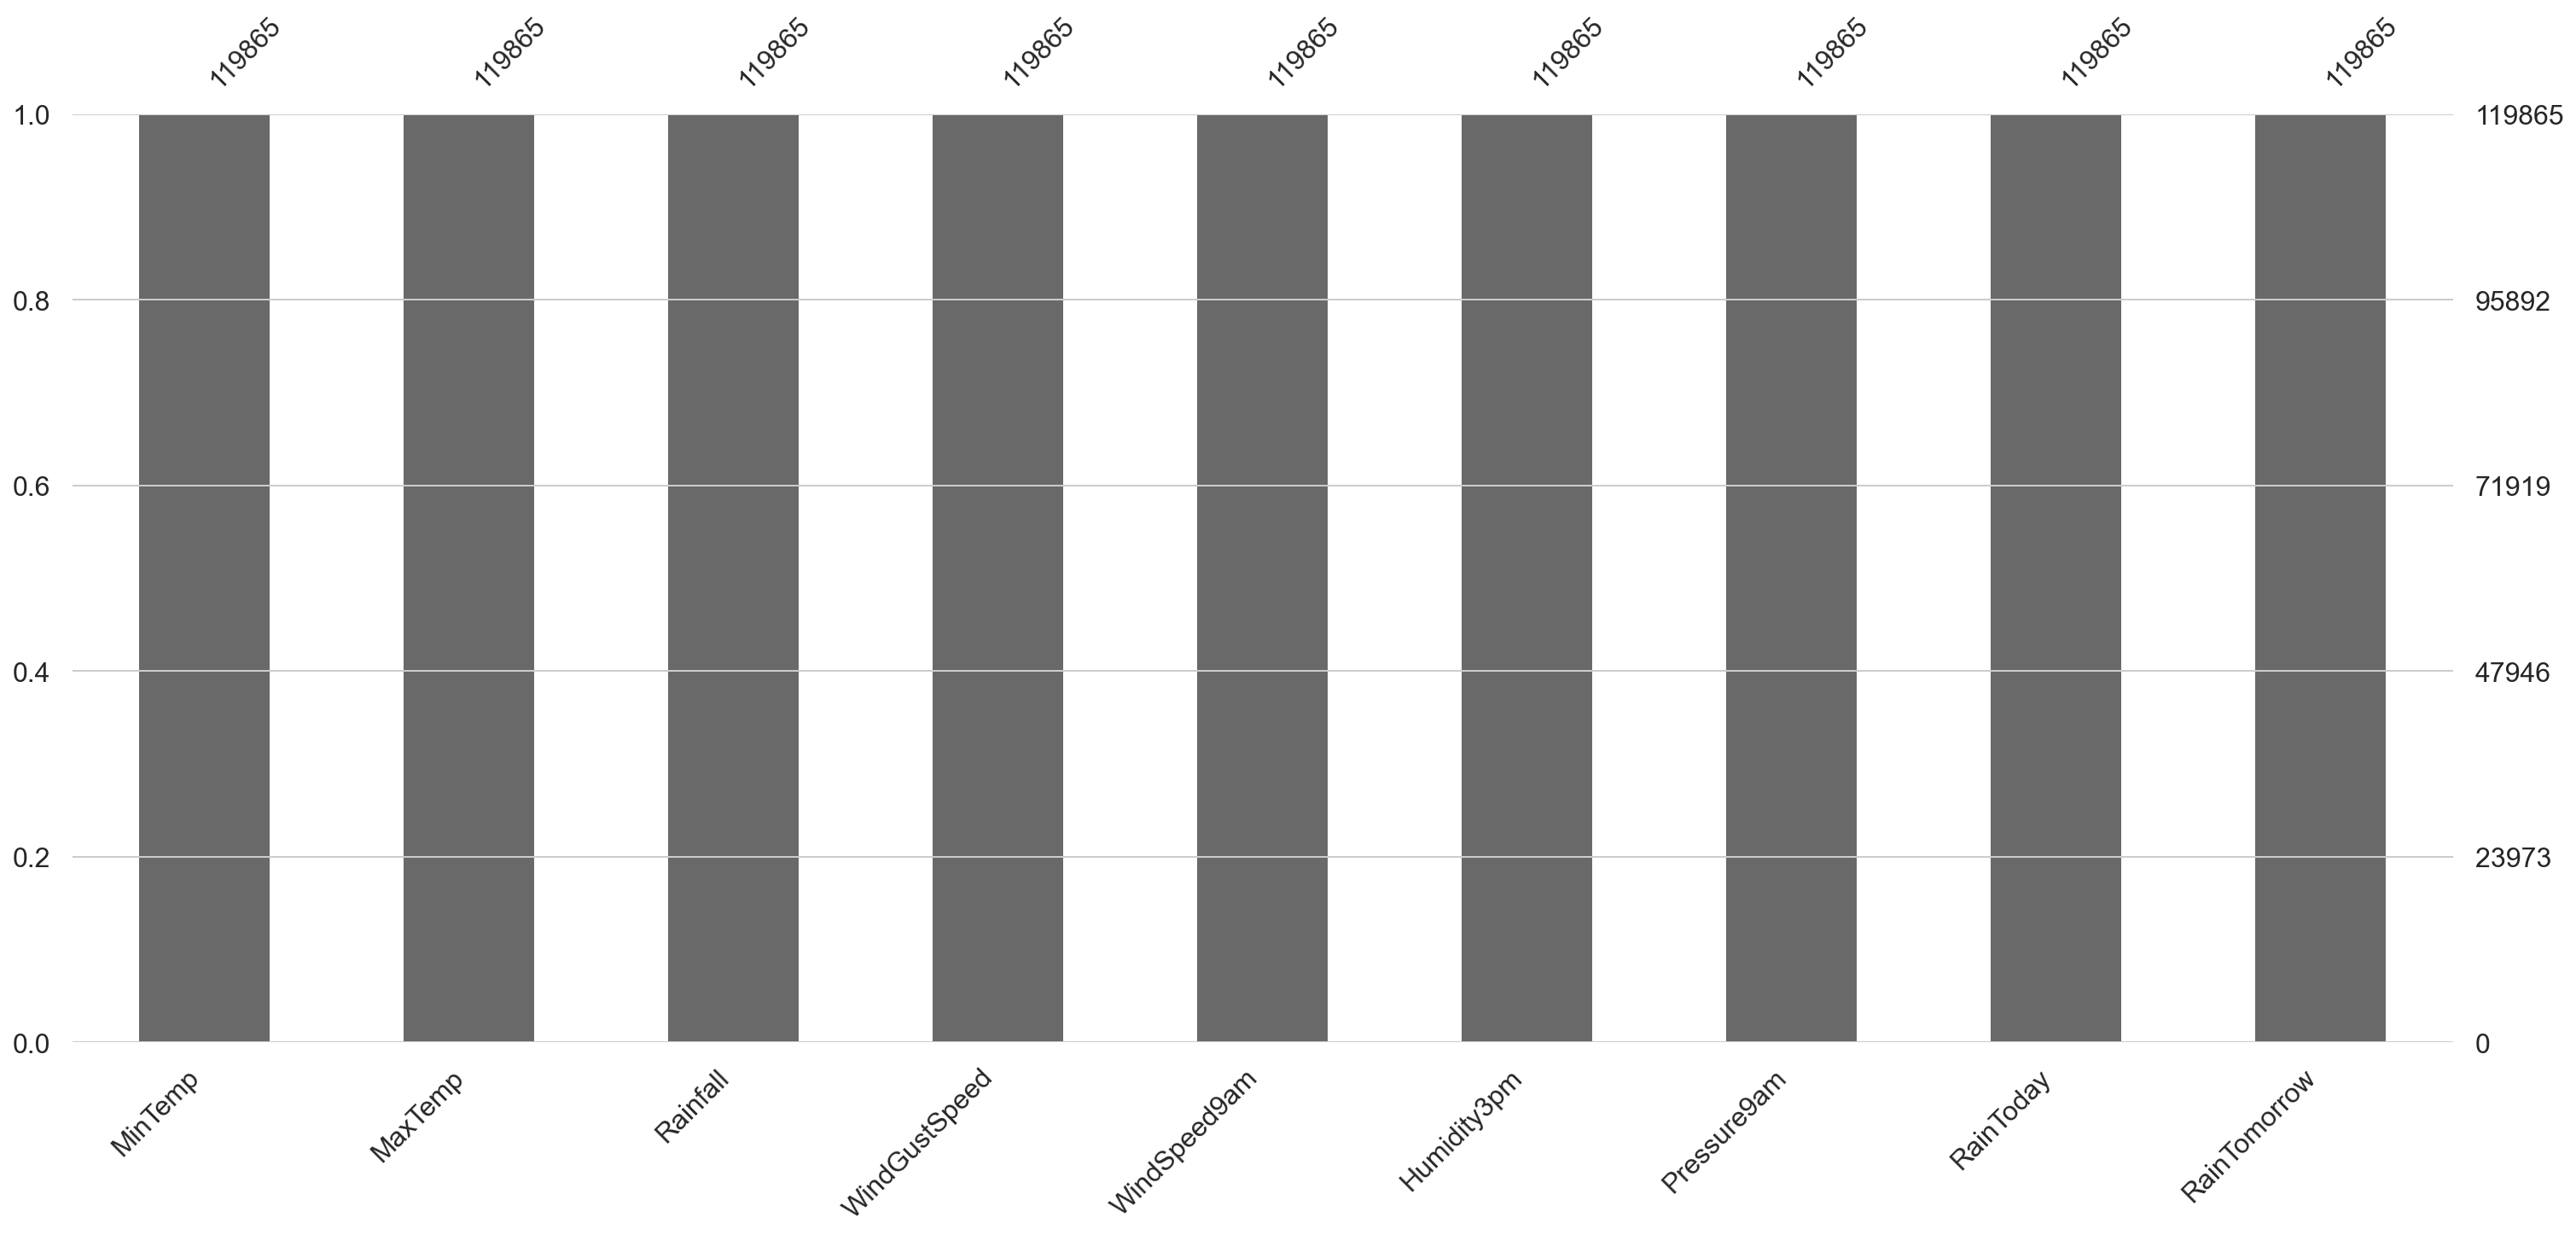

In [209]:
import missingno as msno
  

#values in a bar chart
msno.bar(df2)

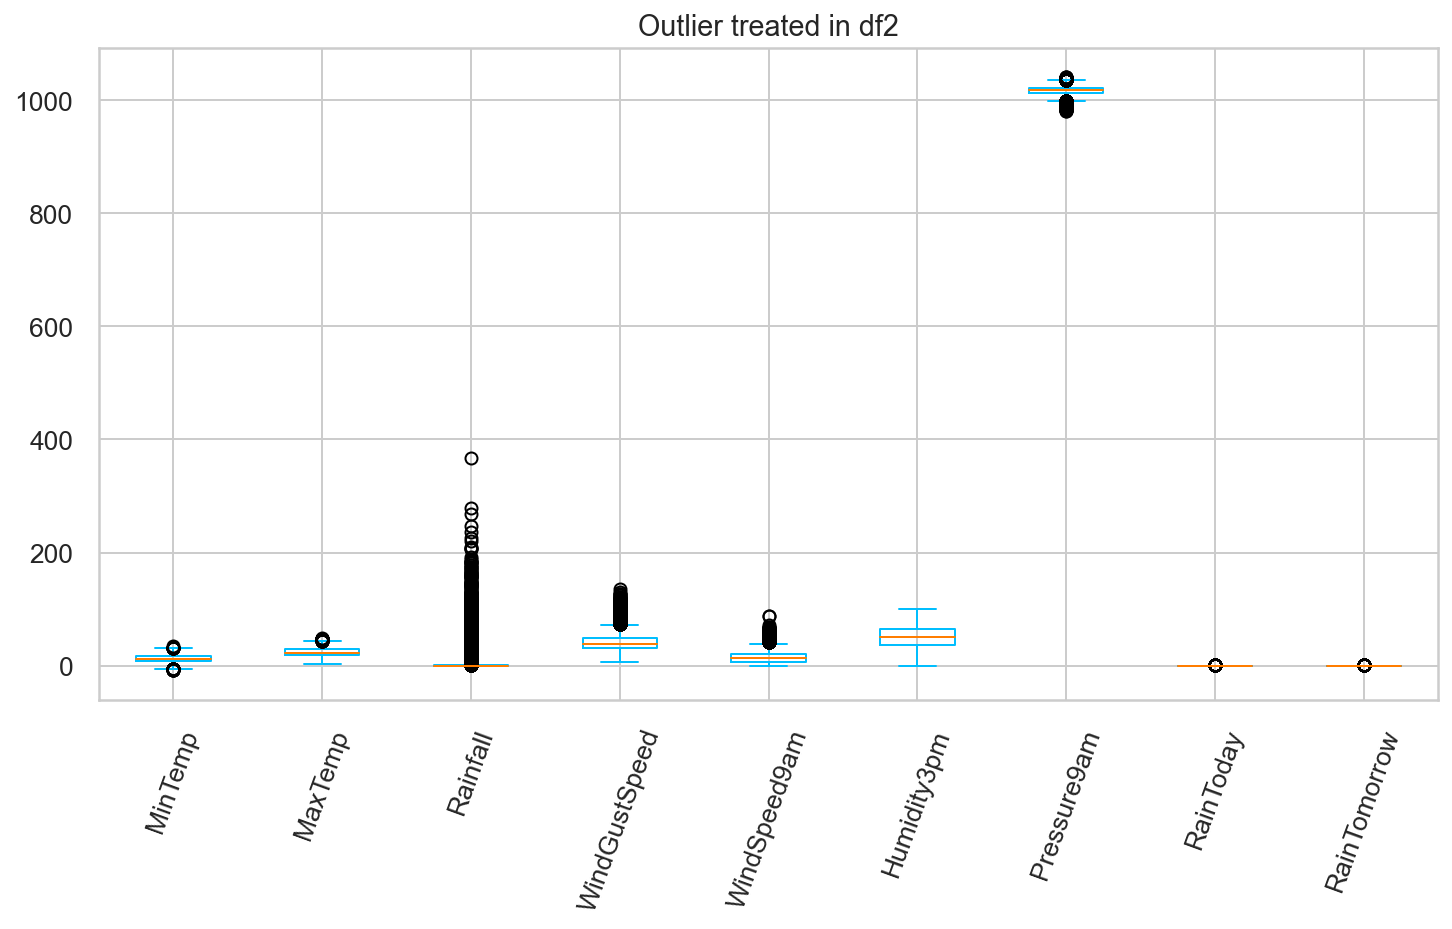

In [210]:
# outliers
df2.plot(kind='box',figsize=(12,6))
plt.xticks(rotation=70);
plt.title('Outlier treated in df2');

In [211]:
# since this ia srain fall data and requires outliers in case we keep the dsame



In [212]:
df2.shape

(119865, 9)

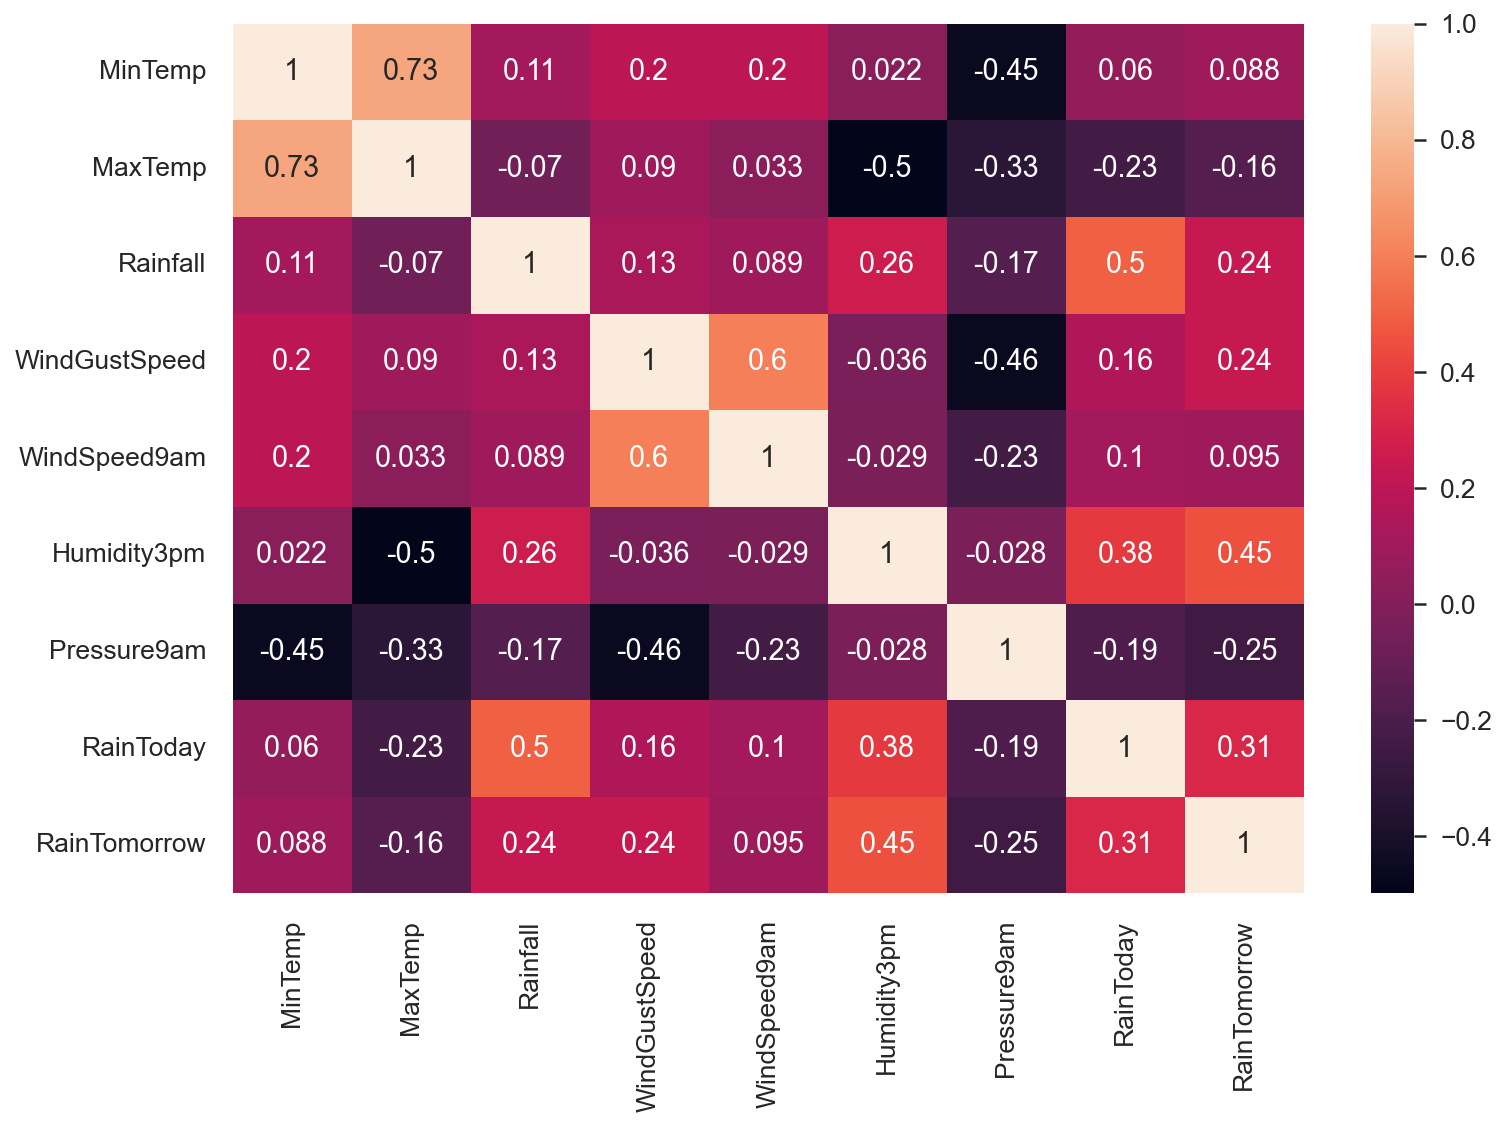

In [213]:
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

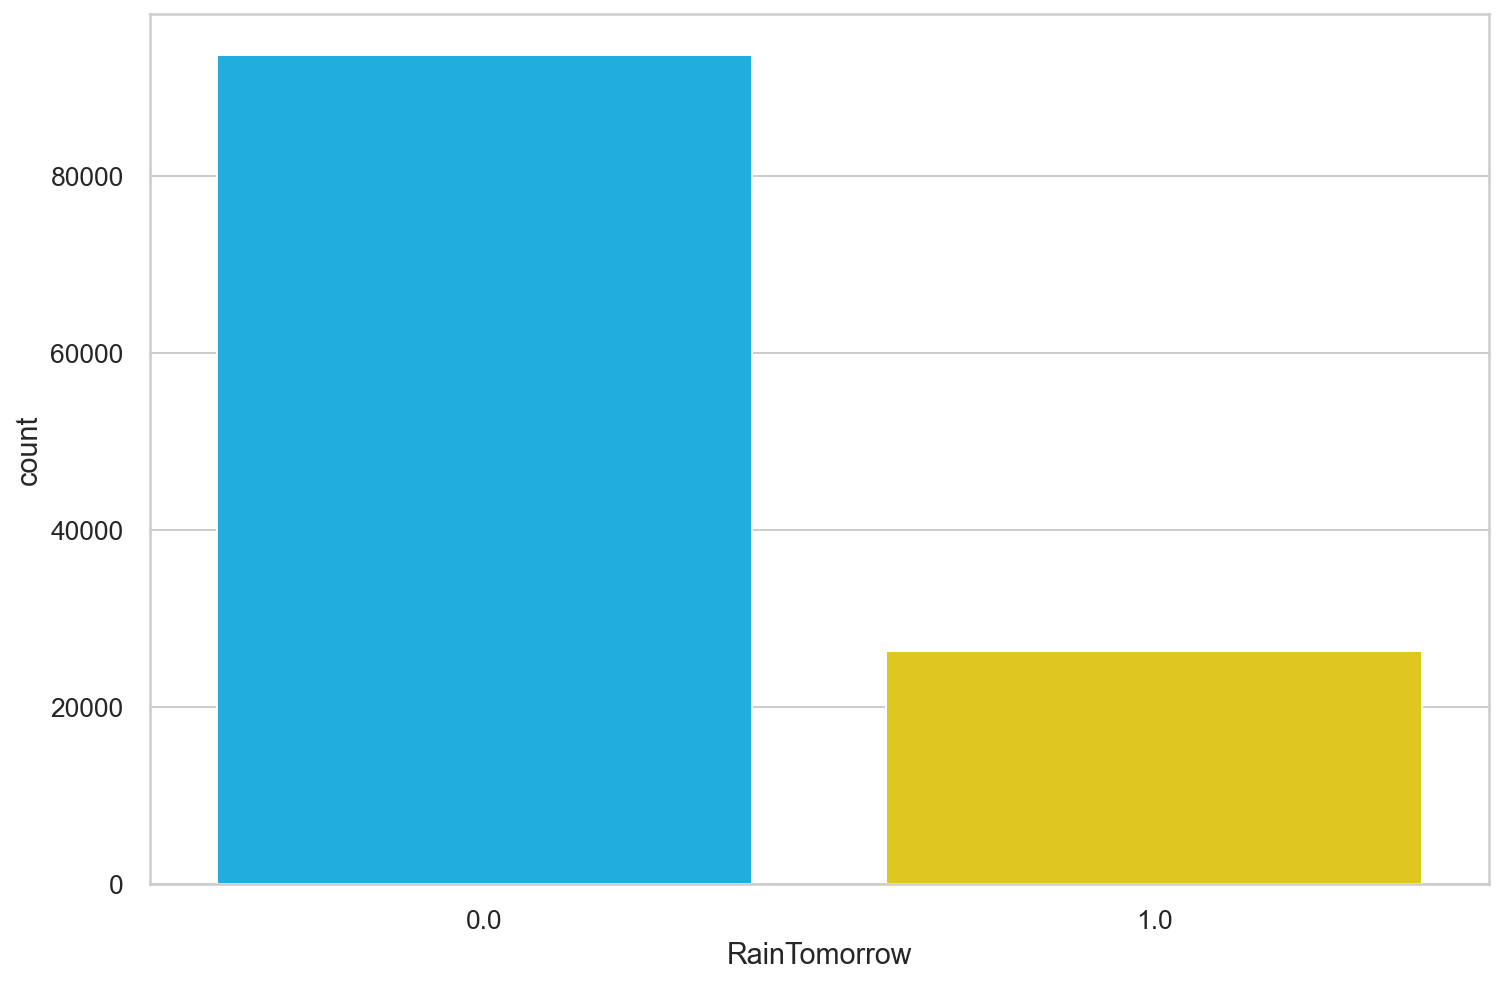

In [214]:
sns.countplot(df2.RainTomorrow);

In [ ]:
# Data is imbalanceed

In [215]:
df2.RainTomorrow.value_counts() / df2.shape[0]

0.0    0.78087
1.0    0.21913
Name: RainTomorrow, dtype: float64

### Step 4.3 : Normalising the dataset 


In [216]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()


In [217]:
scaler.fit(df2)


MinMaxScaler()

In [218]:
df2.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity3pm  \
0     13.4     22.9       0.6           44.0          20.0         22.0   
1      7.4     25.1       0.0           44.0           4.0         25.0   
2     12.9     25.7       0.0           46.0          19.0         30.0   
3      9.2     28.0       0.0           24.0          11.0         16.0   
4     17.5     32.3       1.0           41.0           7.0         33.0   

   Pressure9am  RainToday  RainTomorrow  
0       1007.7        0.0           0.0  
1       1010.6        0.0           0.0  
2       1007.6        0.0           0.0  
3       1017.6        0.0           0.0  
4       1010.8        0.0           0.0

In [219]:
df2 = pd.DataFrame(scaler.transform(df2), index=df2.index, columns=df2.columns)
df2.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity3pm  \
0  0.513064  0.446154  0.001632       0.294574      0.229885         0.22   
1  0.370546  0.494505  0.000000       0.294574      0.045977         0.25   
2  0.501188  0.507692  0.000000       0.310078      0.218391         0.30   
3  0.413302  0.558242  0.000000       0.139535      0.126437         0.16   
4  0.610451  0.652747  0.002720       0.271318      0.080460         0.33   

   Pressure9am  RainToday  RainTomorrow  
0     0.449587        0.0           0.0  
1     0.497521        0.0           0.0  
2     0.447934        0.0           0.0  
3     0.613223        0.0           0.0  
4     0.500826        0.0           0.0

In [220]:
df3= df2.copy()

In [221]:
df3.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity3pm  \
0  0.513064  0.446154  0.001632       0.294574      0.229885         0.22   
1  0.370546  0.494505  0.000000       0.294574      0.045977         0.25   
2  0.501188  0.507692  0.000000       0.310078      0.218391         0.30   
3  0.413302  0.558242  0.000000       0.139535      0.126437         0.16   
4  0.610451  0.652747  0.002720       0.271318      0.080460         0.33   

   Pressure9am  RainToday  RainTomorrow  
0     0.449587        0.0           0.0  
1     0.497521        0.0           0.0  
2     0.447934        0.0           0.0  
3     0.613223        0.0           0.0  
4     0.500826        0.0           0.0

In [222]:
df3.shape

(119865, 9)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'RainToday'}>,
        <AxesSubplot:title={'center':'RainTomorrow'}>]], dtype=object)

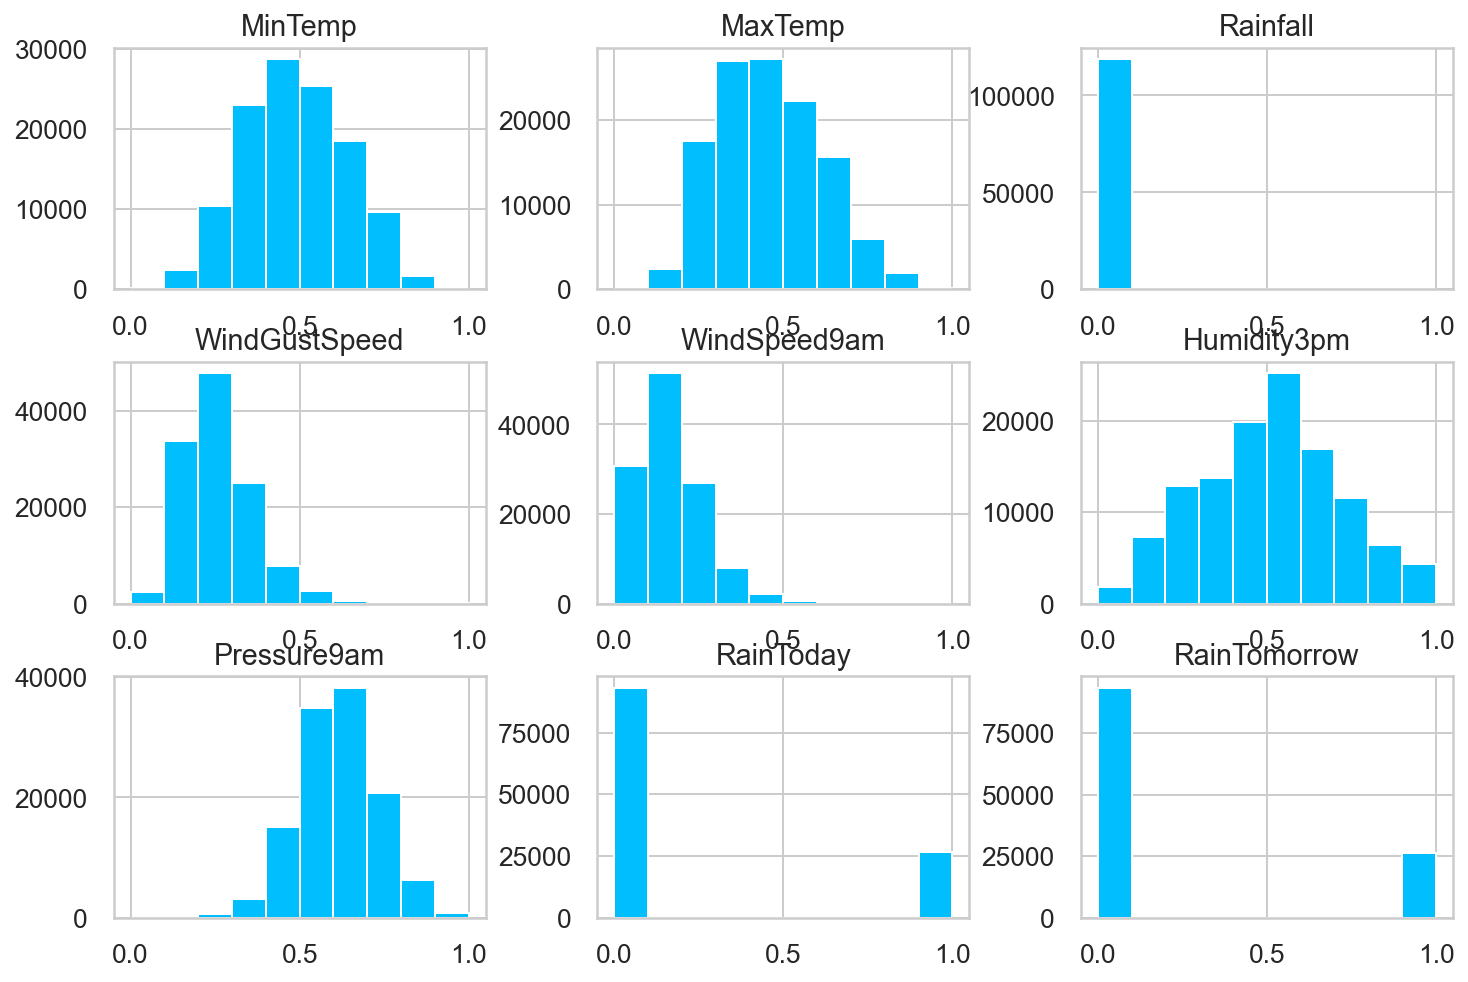

In [223]:

df3.hist()

### step 4.4 : creating dependant and independant  variables

In [224]:

X = df3[['MinTemp','MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',  'Humidity3pm', 'Pressure9am', 'RainToday']]
y = df3[['RainTomorrow']]

In [225]:
X.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity3pm  \
0  0.513064  0.446154  0.001632       0.294574      0.229885         0.22   
1  0.370546  0.494505  0.000000       0.294574      0.045977         0.25   
2  0.501188  0.507692  0.000000       0.310078      0.218391         0.30   
3  0.413302  0.558242  0.000000       0.139535      0.126437         0.16   
4  0.610451  0.652747  0.002720       0.271318      0.080460         0.33   

   Pressure9am  RainToday  
0     0.449587        0.0  
1     0.497521        0.0  
2     0.447934        0.0  
3     0.613223        0.0  
4     0.500826        0.0

### Step 5.1 : Splitting Training set and test set

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [242]:
# COnsidering a 20% split for the test train data

### Step 5.2 : Converting to tensor

In [42]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95892, 8]) torch.Size([95892])
torch.Size([23973, 8]) torch.Size([23973])


### Step 5.3 : Multi layer perceptron

In [43]:
class Net(nn.Module):
    def __init__(self, n_features):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [44]:
net = Net(X_train.shape[1])

In [45]:
criterion = nn.BCELoss()

In [46]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
net = net.to(device)
criterion = criterion.to(device)

In [48]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [49]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)
for epoch in range(1000):
    
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
        
        train_acc = calculate_accuracy(y_train, y_pred)
        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        test_acc = calculate_accuracy(y_test, y_test_pred)
        print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 0.852, accuracy: 0.219
Test  set - loss: 0.851, accuracy: 0.221

epoch 100
Train set - loss: 0.68, accuracy: 0.777
Test  set - loss: 0.68, accuracy: 0.775

epoch 200
Train set - loss: 0.529, accuracy: 0.781
Test  set - loss: 0.532, accuracy: 0.779

epoch 300
Train set - loss: 0.503, accuracy: 0.781
Test  set - loss: 0.507, accuracy: 0.779

epoch 400
Train set - loss: 0.483, accuracy: 0.781
Test  set - loss: 0.488, accuracy: 0.779

epoch 500
Train set - loss: 0.465, accuracy: 0.781
Test  set - loss: 0.471, accuracy: 0.779

epoch 600
Train set - loss: 0.449, accuracy: 0.802
Test  set - loss: 0.455, accuracy: 0.8

epoch 700
Train set - loss: 0.435, accuracy: 0.82
Test  set - loss: 0.442, accuracy: 0.816

epoch 800
Train set - loss: 0.423, accuracy: 0.823
Test  set - loss: 0.429, accuracy: 0.82

epoch 900
Train set - loss: 0.409, accuracy: 0.826
Test  set - loss: 0.415, accuracy: 0.822



In [50]:
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [51]:
net = torch.load(MODEL_PATH)

In [52]:
classes = ['No rain', 'Raining']
y_pred = net(X_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.83      0.97      0.90     18683
     Raining       0.78      0.31      0.45      5290

    accuracy                           0.83     23973
   macro avg       0.81      0.64      0.67     23973
weighted avg       0.82      0.83      0.80     23973



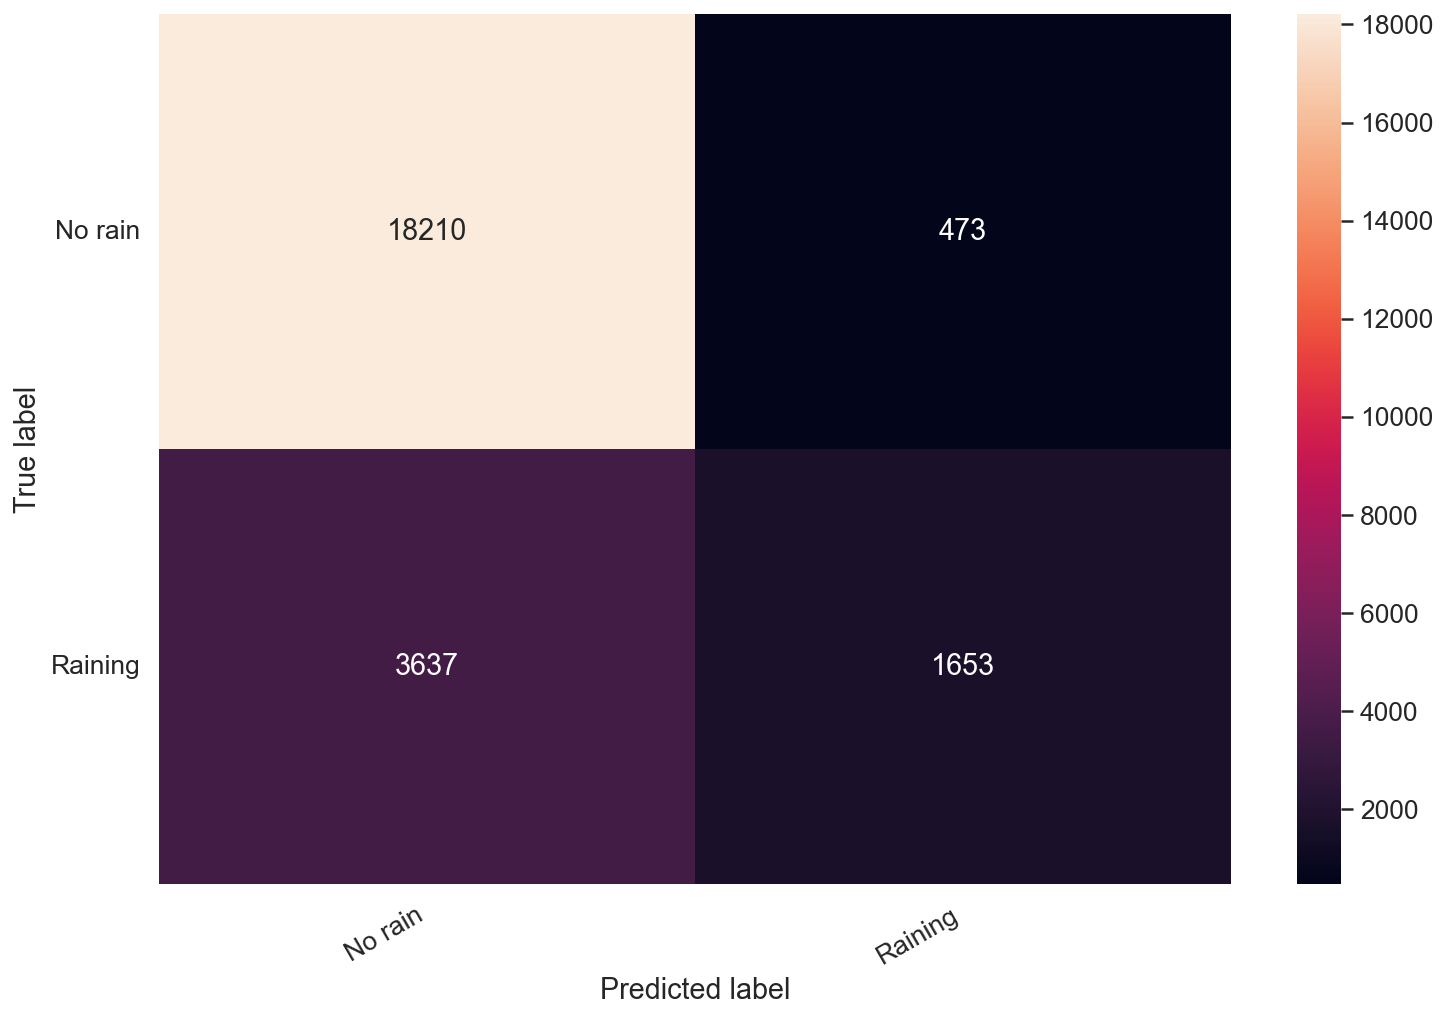

In [53]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [243]:
# Checking if the model works 

In [54]:
def will_it_rain(MinTemp,MaxTemp, Rainfall , WindGustSpeed ,WindSpeed9am ,  Humidity3pm , Pressure, rain_today):
    
    t = torch.as_tensor([MinTemp,MaxTemp, Rainfall , WindGustSpeed ,WindSpeed9am ,  Humidity3pm , Pressure, rain_today]) \
      .float() \
      .to(device)
    output = net(t)
    return output.ge(0.5).item()


#MinTemp = 13.4  ,MaxTemp = 22 , Rainfall = 10, WindGustSpeed = 40 ,WindSpeed9am = 20 ,  Humidity3pm = 10, Pressure= 2, rain_today = True

In [55]:
#will_it_rain(rainfall=10, humidity=10, rain_today=True, pressure=2)
will_it_rain(MinTemp = 13.4  ,MaxTemp = 22 , Rainfall = 10, WindGustSpeed = 40 ,WindSpeed9am = 20 ,  Humidity3pm = 10, Pressure= 1-1000, rain_today = False)

True

In [56]:
#will_it_rain(rainfall=10, humidity=10, rain_today=True, pressure=2)
will_it_rain(MinTemp = 15.6  ,MaxTemp = 19 , Rainfall = 15.6, WindGustSpeed = 61 ,WindSpeed9am = 28 ,  Humidity3pm = 93, Pressure= 983, rain_today = True)

False

#### Step 5.3.1 : MLP hyper parameter tuning

In [57]:
import time

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [59]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [60]:
X_train

tensor([[0.6152, 0.4901, 0.0000,  ..., 0.5100, 0.6562, 0.0000],
        [0.7553, 0.7429, 0.0000,  ..., 0.2500, 0.5636, 0.0000],
        [0.6247, 0.4769, 0.0664,  ..., 0.5400, 0.4512, 1.0000],
        ...,
        [0.5914, 0.6857, 0.0000,  ..., 0.3000, 0.5041, 0.0000],
        [0.2684, 0.3780, 0.0000,  ..., 0.5300, 0.7851, 0.0000],
        [0.6532, 0.5736, 0.0011,  ..., 0.7800, 0.5174, 0.0000]])

In [61]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

torch.Size([95892, 8]) torch.Size([95892]) torch.Size([23973, 8]) torch.Size([23973])


In [62]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [63]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.847 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.851 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.847 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.850 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.847 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.850 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver

In [64]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     18683
         1.0       0.75      0.46      0.57      5290

    accuracy                           0.85     23973
   macro avg       0.81      0.71      0.74     23973
weighted avg       0.84      0.85      0.83     23973



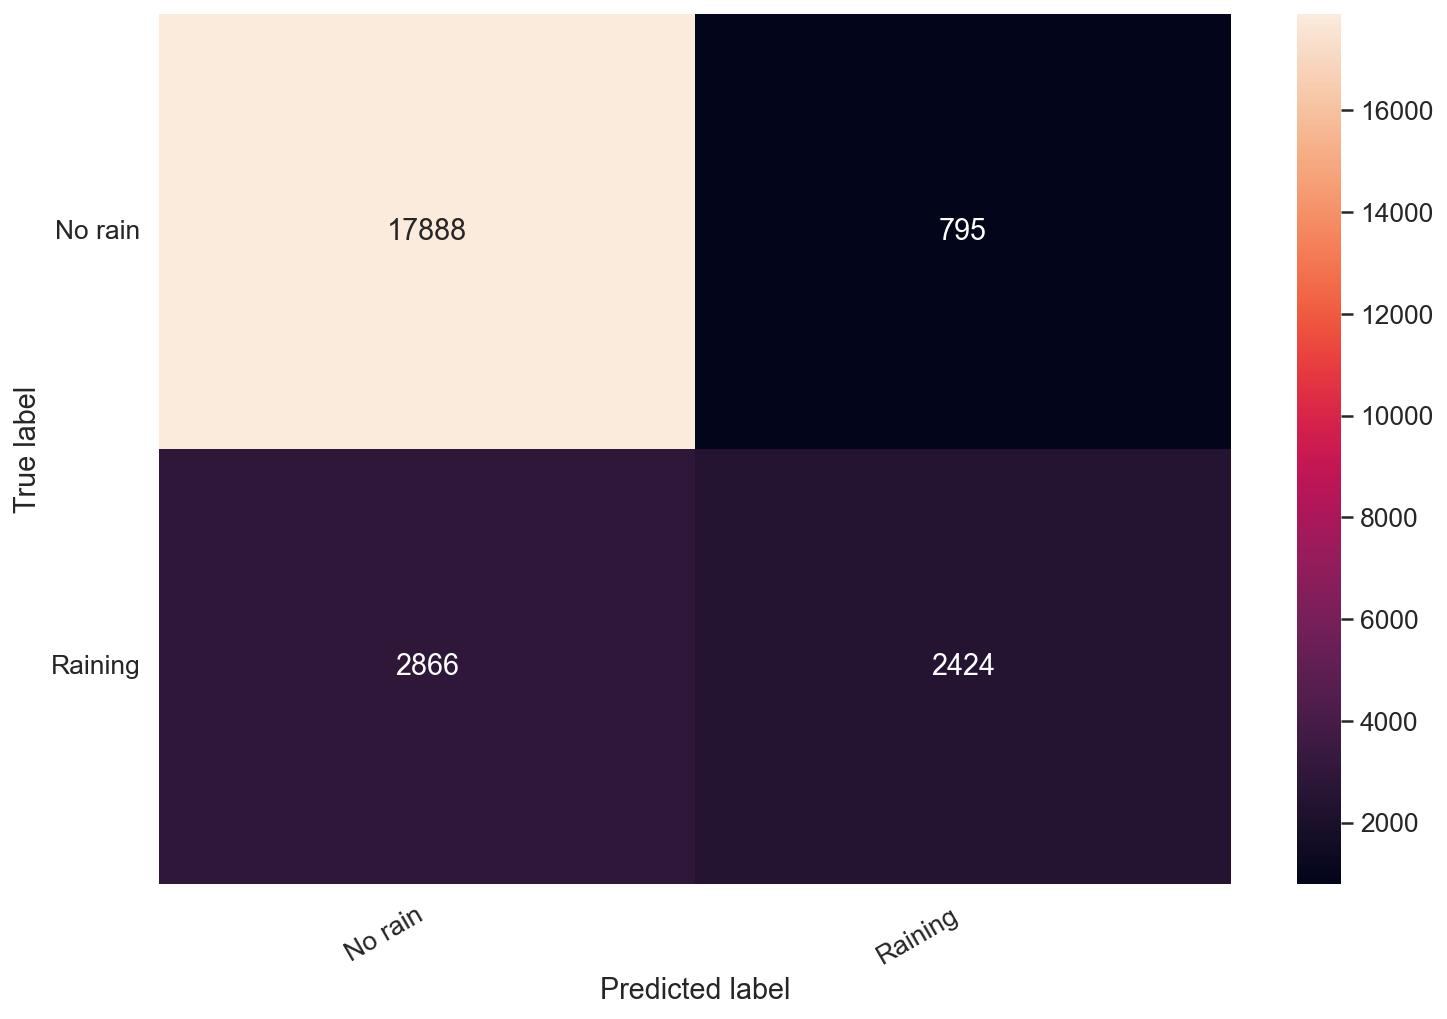

In [65]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [70]:
from sklearn.metrics import mean_absolute_error
#

mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

15.271346271038055


In [72]:
import sklearn.metrics as metrics

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#F1 = 2 * (precision * recall) / (precision + recall)
#print("F1 Score: " , f1_score(y_test, y_pred))

Accuracy: 0.8472865306803488
Precision: 0.7530288909599254
Recall: 0.45822306238185256


In [98]:
Accuracy= 0.8472865306803488
Precision= 0.7530288909599254
Recall= 0.45822306238185256

In [99]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [100]:
print("F1 Score: " , F1)

F1 Score:  0.5697496768127864


In [101]:
# predict probabilities


pred_prob2 = clf.predict_proba(X_train)

In [102]:
from sklearn.metrics import roc_curve




fpr2, tpr2, thresh2 = roc_curve(y_train, pred_prob2[:,1], pos_label=1)

In [103]:
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

In [104]:
from sklearn.metrics import roc_auc_score

# auc scores



auc_score2 = roc_auc_score(y_train, pred_prob2[:,1])

In [105]:
print(auc_score2)

0.8705731725151291


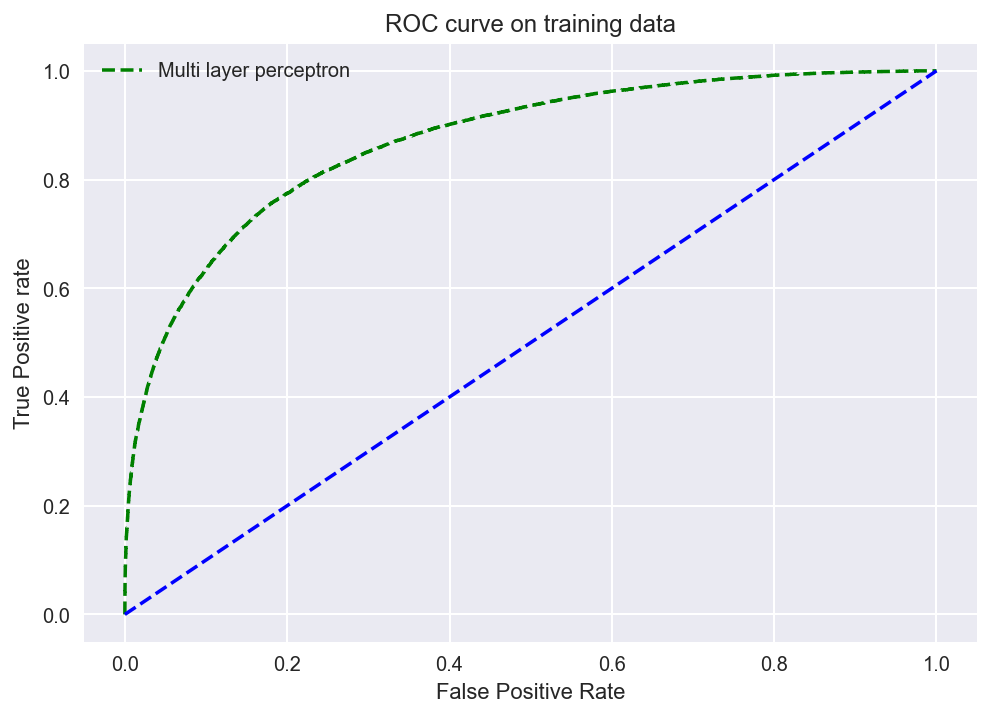

In [106]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Multi layer perceptron')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve on training data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [108]:
clf.score(X_train,y_train)

0.8539189921995578

In [81]:
import joblib
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

In [244]:
# Saving the model

In [84]:
import joblib
# now you can save it to a file
joblib.dump(clf, 'MLPmodel.pkl') 

['MLPmodel.pkl']

In [245]:
#loading the saved model to check

In [86]:
clf2 = joblib.load('MLPmodel.pkl')

In [87]:
clf2.score(X_test,y_test)

0.8472865306803488

### Step 5.4 : Support vector machines

In [156]:
X_train

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
23299   0.615202  0.490110  0.000000       0.255814      0.252874   
136503  0.755344  0.742857  0.000000       0.356589      0.252874   
97643   0.624703  0.476923  0.066376       0.224806      0.172414   
70668   0.425178  0.342857  0.007617       0.271318      0.229885   
127170  0.463183  0.424176  0.000000       0.240310      0.149425   
...          ...       ...       ...            ...           ...   
92082   0.676960  0.604396  0.000544       0.325581      0.229885   
133591  0.163895  0.259341  0.000000       0.007752      0.000000   
123672  0.591449  0.685714  0.000000       0.271318      0.172414   
882     0.268409  0.378022  0.000000       0.085271      0.000000   
20205   0.653207  0.573626  0.001088       0.294574      0.068966   

        Humidity3pm  Pressure9am  RainToday  
23299          0.51     0.656198        0.0  
136503         0.25     0.563636        0.0  
97643          0.54     0.451240        1.0  
70668          0.36     0.633058        1.0  
127170         0.67     0.628099        0.0  
...             ...          ...        ...  
92082          0.70     0.553719        0.0  
133591         0.50     0.902479        0.0  
123672         0.30     0.504132        0.0  
882            0.53     0.785124        0.0  
20205          0.78     0.517355        0.0  

[95892 rows x 8 columns]

In [158]:
from sklearn.svm import SVC

In [159]:
svc = SVC()

In [160]:
#svc.fit(X_train,y_train)

In [161]:
SVMmodel =  svc.fit(X_train,y_train)

In [ ]:
y_pred1 =SVMmodel.predict(X_test)
y_train_pred1 = SVMmodel.predict(X_train)

In [162]:
y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

In [163]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     74916
         1.0       0.78      0.42      0.55     20976

    accuracy                           0.85     95892
   macro avg       0.82      0.70      0.73     95892
weighted avg       0.84      0.85      0.83     95892



In [164]:
confusion_matrix(y_train,y_train_pred)

array([[72466,  2450],
       [12064,  8912]], dtype=int64)

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     18683
         1.0       0.78      0.41      0.54      5290

    accuracy                           0.84     23973
   macro avg       0.81      0.69      0.72     23973
weighted avg       0.84      0.84      0.83     23973



In [166]:
confusion_matrix(y_test,y_pred)

array([[18050,   633],
       [ 3106,  2184]], dtype=int64)

In [167]:
classes = ['No rain', 'Raining']

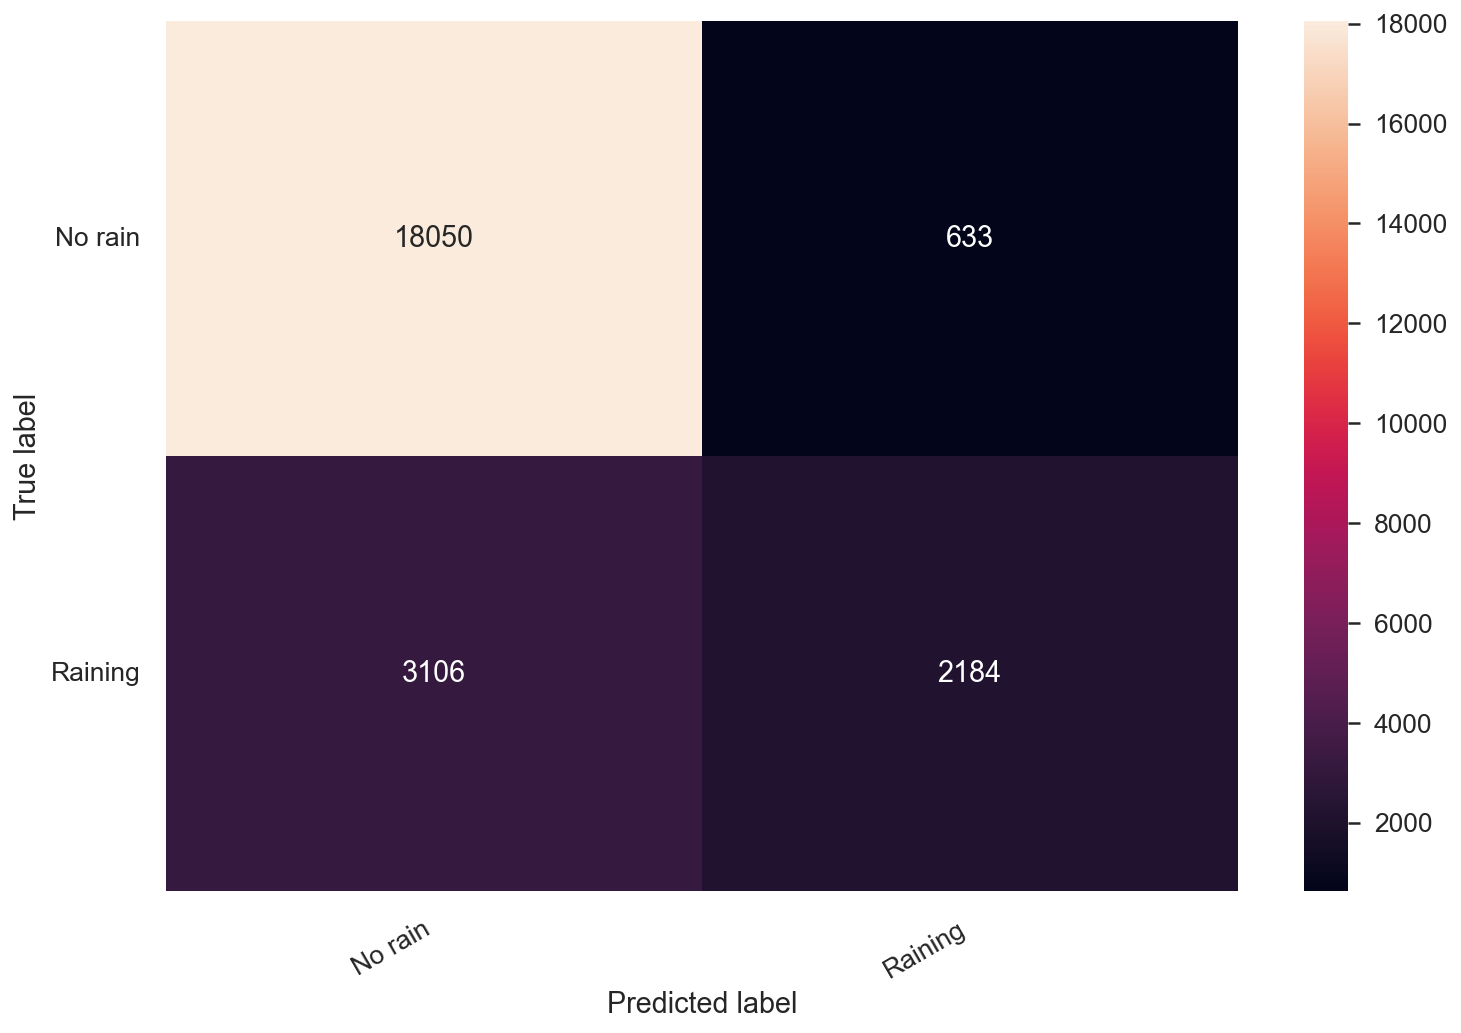

In [168]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [169]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [170]:
print('Training Accuracy ---->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  ---->',accuracy_score(y_test,y_pred))

Training Accuracy ----> 0.8486422225003128
Testing Accuracy  ----> 0.8440328703124348


In [177]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#F1 = 2 * (precision * recall) / (precision + recall)
#print("F1 Score: " , f1_score(y_test, y_pred))

Accuracy: 0.8440328703124348
Precision: 0.7752928647497338
Recall: 0.4128544423440454


In [178]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [179]:
print("F1 Score: " , F1)

F1 Score:  0.5697496768127864


In [181]:
# predict probabilities


pred_prob2 = clf.predict_proba(X_train)

In [182]:
from sklearn.metrics import roc_curve




fpr2, tpr2, thresh2 = roc_curve(y_train, pred_prob2[:,1], pos_label=1)

In [183]:
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

In [184]:
from sklearn.metrics import roc_auc_score

# auc scores



auc_score2 = roc_auc_score(y_train, pred_prob2[:,1])

In [185]:
print(auc_score2)

0.8705731731514886


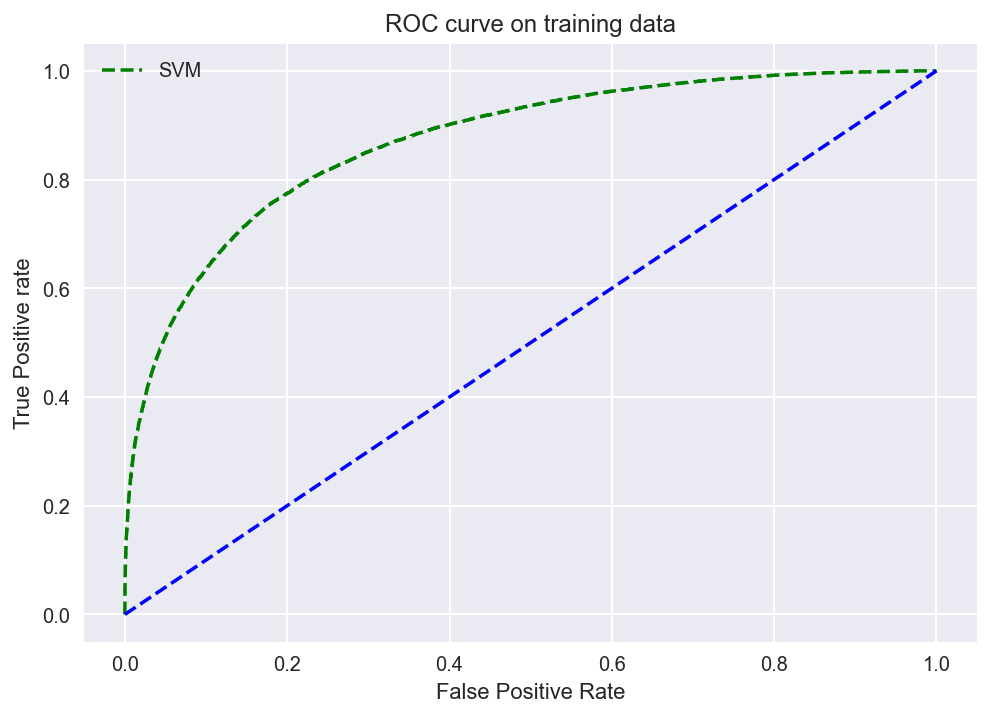

In [186]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve on training data')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
X_train

### Step 5.4.1 : SVM hyper parameter tuning

In [187]:
def svm(X,y):
    scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    
    #undersample = RandomUnderSampler(sampling_strategy='majority', random_state=0)
    #X, y = undersample.fit_resample(X,y)
    
    tuned_parameters = [
        {'kernel': ['rbf'], 'gamma': [1e-3],'C': [100]},
        #{'kernel': ['linear'], 'C': [10]}
        ]
    
    classifier = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % 'precision' )

    #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    classifier.fit(X_train, y_train)
    
    predictions = classifier.predict(X_test)
    
    return round(accuracy_score(y_test,predictions)*100,2)

In [188]:
accuracy, title = [],[]

In [189]:
title.append("Training Accuracy")
X = X_train
y = y_train

In [190]:
X

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
23299   0.615202  0.490110  0.000000       0.255814      0.252874   
136503  0.755344  0.742857  0.000000       0.356589      0.252874   
97643   0.624703  0.476923  0.066376       0.224806      0.172414   
70668   0.425178  0.342857  0.007617       0.271318      0.229885   
127170  0.463183  0.424176  0.000000       0.240310      0.149425   
...          ...       ...       ...            ...           ...   
92082   0.676960  0.604396  0.000544       0.325581      0.229885   
133591  0.163895  0.259341  0.000000       0.007752      0.000000   
123672  0.591449  0.685714  0.000000       0.271318      0.172414   
882     0.268409  0.378022  0.000000       0.085271      0.000000   
20205   0.653207  0.573626  0.001088       0.294574      0.068966   

        Humidity3pm  Pressure9am  RainToday  
23299          0.51     0.656198        0.0  
136503         0.25     0.563636        0.0  
97643          0.54     0.451240        1.0  
70668          0.36     0.633058        1.0  
127170         0.67     0.628099        0.0  
...             ...          ...        ...  
92082          0.70     0.553719        0.0  
133591         0.50     0.902479        0.0  
123672         0.30     0.504132        0.0  
882            0.53     0.785124        0.0  
20205          0.78     0.517355        0.0  

[95892 rows x 8 columns]

In [191]:
y

RainTomorrow
23299            0.0
136503           0.0
97643            0.0
70668            0.0
127170           0.0
...              ...
92082            0.0
133591           0.0
123672           0.0
882              0.0
20205            1.0

[95892 rows x 1 columns]

In [192]:
accuracy.append(svm(X,y))

In [193]:
score = pd.DataFrame(np.array([accuracy]).T, columns=["Accuracy (%)"], index=title)
display(score)

Accuracy (%)
Training Accuracy         84.26

In [246]:
# saving the model

In [171]:
joblib.dump(SVMmodel, 'SVMmodel.pkl') 

['SVMmodel.pkl']

In [247]:
# Loading the model

In [172]:
clf3 = joblib.load('SVMmodel.pkl')

In [174]:
clf3.score(X_test,y_test)

0.8440328703124348

In [ ]:
## Saving the Test sets

In [228]:

X_test.to_csv('x_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)